In [7]:
!pip install pandas scikit-learn nltk joblib

In [8]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import joblib

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
df = pd.read_csv("stock_data.csv")  # Change filename accordingly
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [10]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = word_tokenize(text)
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

In [13]:
import nltk
import os

# Create a local nltk_data folder
nltk_data_path = os.path.join(os.getcwd(), "nltk_data")
os.makedirs(nltk_data_path, exist_ok=True)

# Download to the specific folder
nltk.download("punkt", download_dir=nltk_data_path)
nltk.download("stopwords", download_dir=nltk_data_path)

# Tell NLTK to use this path
nltk.data.path.append(nltk_data_path)

[nltk_data] Downloading package punkt to C:\Users\raiya\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raiya\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
# Clear corrupted cache
import shutil
shutil.rmtree(os.path.expanduser('~/nltk_data/tokenizers/punkt'), ignore_errors=True)

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Clean the texts
texts = [clean_text(t) for t in df['Text']]
labels = df['Sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [19]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced')

In [20]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7834339948231234

Classification Report:
               precision    recall  f1-score   support

          -1       0.69      0.75      0.72       427
           1       0.85      0.80      0.82       732

    accuracy                           0.78      1159
   macro avg       0.77      0.78      0.77      1159
weighted avg       0.79      0.78      0.79      1159



In [21]:
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

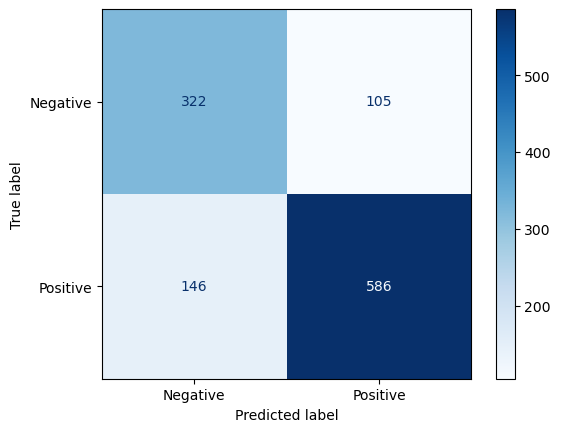

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you already have:
# y_test (true labels)
# y_pred (predicted labels)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])  # For -1 = Negative, 1 = Positive

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')

In [24]:
print(vectorizer.get_feature_names_out())

['00025' '013' '02' ... 'œrecalibratingâ' 'œsince' 'œwe']
